In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import json
import numpy as np

# The Data Sets - Penguins 

In [2]:
penguins_df = pd.read_csv('COMP472-A1-datasets/penguins.csv')
# print(penguins_df.head())

In [3]:
# print csv file info
print(penguins_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB
None


In [4]:
# label encoding string values to int
le = preprocessing.LabelEncoder()
penguins_df['island'] = le.fit_transform(penguins_df['island'])
penguins_df['sex'] = le.fit_transform(penguins_df['sex'])
penguins_df['species'] = le.fit_transform(penguins_df['species'])

# print(penguins_df.info()) 
# print(penguins_df.head())

In [5]:
# converting the features into 1-hot vectors
# penguins_df = pd.get_dummies(penguins_df, columns=['species'], prefix='species', dtype='int64')
# penguins_df = pd.get_dummies(penguins_df, columns=['sex'], prefix='sex', dtype='int64')
# penguins_df = pd.get_dummies(penguins_df, columns=['island'], prefix='island', dtype='int64')

# print(penguins_df.info()) 
# print(penguins_df.head())

# Note we've left this commented out to not affect columns of the table being used for the rest of the results


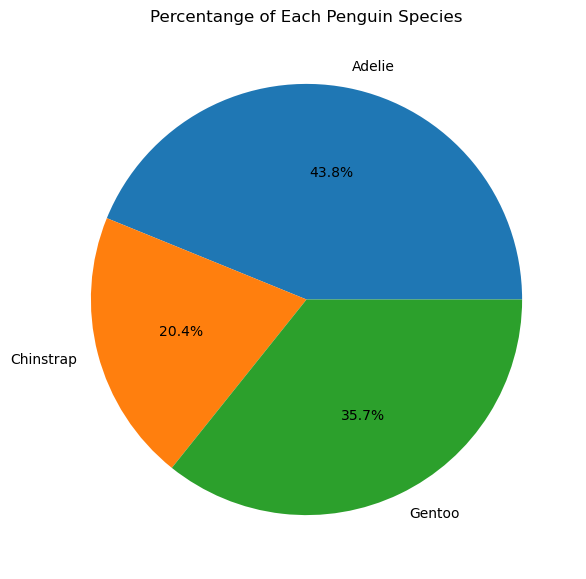

In [6]:
# plot pie chart based on output class species
total = penguins_df['species'].count()

num_adelie = penguins_df[penguins_df['species'] == 0]['species'].count()
percent_adelie = num_adelie / total * 100

num_chinstrap = penguins_df[penguins_df['species'] == 1]['species'].count()
percent_chinstrap = num_chinstrap / total * 100

num_gentoo = penguins_df[penguins_df['species'] == 2]['species'].count()
percent_gentoo = num_gentoo / total * 100

species_percentages = [percent_adelie, percent_chinstrap, percent_gentoo]

plt.figure(figsize=(7, 7))
plt.pie(species_percentages, labels=['Adelie', 'Chinstrap', 'Gentoo'], autopct='%1.1f%%')
plt.title("Percentange of Each Penguin Species")
plt.savefig('penguins_species_pie_chart.png')

plt.show()

# Note: dataset is not balanced as there are more almost twice as many data instances of Adelie as Chinstraps, likely creating a bias towards Adelie
# Adeli: 43.8% 
# Gentoo: 35.7%
# Chinstrap: 20.4%

# imbalanced dataset : f1 score

In [7]:
# split data into training and testing sets
# default split is 25% testing, 75% training
# data is shuffled by default, but no seeding applied 

X, y = [penguins_df.drop('species', axis=1), penguins_df['species']]

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y)

### Generate Performance Measures File 

In [8]:
with open('penguin-performance.txt', 'w') as f:
    f.write('Performance Measures \n\n\n')

In [9]:
with open('penguin-performance_5_runs.txt', 'w') as f:
    f.write('Performance Measures \n\n\n')

# Base-DT
=> a decision tree with the default parameters 

'penguin_species_base_dt.pdf'

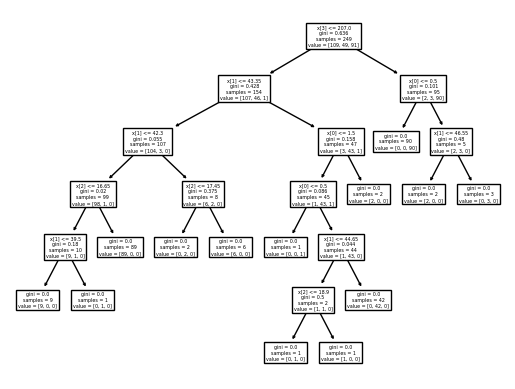

In [10]:
# default parameter for criterion = Gini impurity 
dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train_set, y_train_set)
tree.plot_tree(dtc)

dot_data = tree.export_graphviz(dtc, out_file=None,
    feature_names= ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_grams', 'sex'],
    class_names=['Adelie','Chinstrap','Gentoo'],
    filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 

graph.render("penguin_species_base_dt")   # save to pdf

In [11]:
y_predict = dtc.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199         4050    1  
126         3500    0  
134         3400    0  
31          3950    1  
..           ...  ...  
298

# Base-DT Performance Measures 

In [12]:
with open('penguin-performance.txt', 'a') as f:
    f.write('**********************************************************\n\n(A) Base-DT Performance Measures \n\n')
    f.write('Hyperparameters: \n \t- criterion: Gini impurity \n\t- max_depth: None \n\t- min_samples_split: 2 \n\n')
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Base-DT Code above 5 times.

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199         4050    1  
126         3500    0  
134         3400    0  
31          3950    1  
..           ...  ...  
298

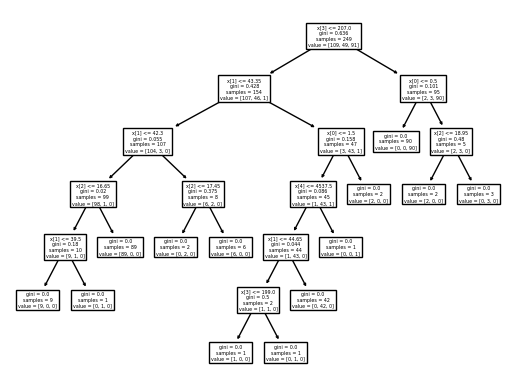

In [13]:
base_dt_accuracy_scores = []
base_dt_f1_scores_macro_avgs = []
base_dt_f1_scores_weighted_avgs = []

for i in range(5):
    # default parameter for criterion = Gini impurity 
    dtc = tree.DecisionTreeClassifier()

    dtc.fit(X_train_set, y_train_set)
    tree.plot_tree(dtc)

    dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names= ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_grams', 'sex'],
        class_names=['Adelie','Chinstrap','Gentoo'],
        filled=True, rounded=True) 
    graph = graphviz.Source(dot_data) 

    # graph.render("penguin_species_base_dt")   # save to pdf

    y_predict = dtc.predict(X_test_set)

    accuracy = accuracy_score(y_test_set, y_predict)
    base_dt_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    base_dt_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    base_dt_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    with open('penguin-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Base-DT Performance Measures \n\n')
        f.write('Hyperparameters: \n \t- criterion: Gini impurity \n\t- max_depth: None \n\t- min_samples_split: 2 \n\n')
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

# Top-DT
=> a Decision Tree found using a gridsearch 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 6}


'penguin_species_top_dt.pdf'

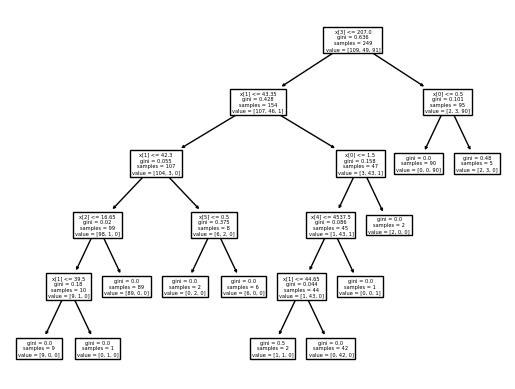

In [14]:
# create decision tree model
dtc_top_dt = tree.DecisionTreeClassifier()

# define hyperparameters to test for best model
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4],
    'min_samples_split': [6, 42, 90],
}

# use grid search to find best hyperparameters
gs = GridSearchCV(dtc_top_dt, hyperparameters, verbose=1)
gs.fit(X_train_set, y_train_set)
best_hyperparameters = gs.best_params_

print('Best hyperparameters:\n', best_hyperparameters)

# create decision tree model with best hyperparameters
dtc_top_dt_best_params = tree.DecisionTreeClassifier(**best_hyperparameters)
# train model with best hyperparameters
dtc_top_dt_best_params.fit(X_train_set, y_train_set)

# plot decision tree
tree.plot_tree(dtc_top_dt_best_params)

dot_data = tree.export_graphviz(dtc_top_dt_best_params, out_file=None,
    feature_names= ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_grams', 'sex'],
    class_names=['Adelie','Chinstrap','Gentoo'],
    filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 

graph.render("penguin_species_top_dt")   # save to pdf

In [15]:
y_predict = dtc_top_dt_best_params.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199         4050    1  
126         3500    0  
134         3400    0  
31          3950    1  
..           ...  ...  
298

# Top-DT Performance Measures 

In [16]:
with open('penguin-performance.txt', 'a') as f:
    f.write('\n\n\n**********************************************************\n\n(A) Top-DT Performance Measures \n\n')
    f.write("Hyperparameters: " + json.dumps(best_hyperparameters) + "\n\n")
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Top-Dt code above 5 times.

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 6}
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex 

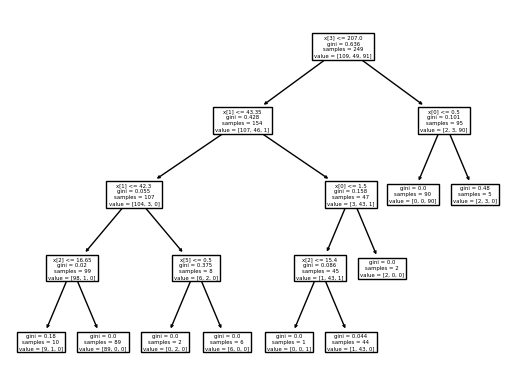

In [17]:
top_dt_accuracy_scores = []
top_dt_f1_scores_macro_avgs = []
top_dt_f1_scores_weighted_avgs = []

for i in range(5):
    # create decision tree model
    dtc_top_dt = tree.DecisionTreeClassifier()

    # define hyperparameters to test for best model
    hyperparameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 4],
        'min_samples_split': [6, 42, 90],
    }

    # use grid search to find best hyperparameters
    gs = GridSearchCV(dtc_top_dt, hyperparameters, verbose=1)
    gs.fit(X_train_set, y_train_set)
    best_hyperparameters = gs.best_params_

    print('Best hyperparameters:\n', best_hyperparameters)

    # create decision tree model with best hyperparameters
    dtc_top_dt_best_params = tree.DecisionTreeClassifier(**best_hyperparameters)
    # train model with best hyperparameters
    dtc_top_dt_best_params.fit(X_train_set, y_train_set)

    # plot decision tree
    tree.plot_tree(dtc_top_dt_best_params)

    dot_data = tree.export_graphviz(dtc_top_dt_best_params, out_file=None,
        feature_names= ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_grams', 'sex'],
        class_names=['Adelie','Chinstrap','Gentoo'],
        filled=True, rounded=True) 
    graph = graphviz.Source(dot_data) 

    # graph.render("penguin_species_top_dt")   # save to pdf
    
    y_predict = dtc_top_dt_best_params.predict(X_test_set)

    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))

    accuracy = accuracy_score(y_test_set, y_predict)
    top_dt_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    top_dt_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    top_dt_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    with open('penguin-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Top-DT Performance Measures \n\n')
        f.write("Hyperparameters: " + json.dumps(best_hyperparameters) + "\n\n")
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

# Base-MLP
=> a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters

In [18]:
# activation = 'logistic' => sigmoid function
# solver = 'sgd' => stochastic gradient descent
# default max_iter = 200 (number of epochs)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
mlp.fit(X_train_set, y_train_set)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

In [19]:
y_predict = mlp.predict(X_test_set)
print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))


     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199         4050    1  
126         3500    0  
134         3400    0  
31          3950    1  
..           ...  ...  
298

# Base-MLP Performance Measures 

In [20]:
with open('penguin-performance.txt', 'a') as f:
    f.write('\n\n\n**********************************************************\n\n(A) Base-MLP Performance Measures \n\n')
    f.write('Hyperparameters: \n \t- hidden_layer_sizes: (100, 100) \n\t- activation: logistic \n\t- solver: sgd \n\t- max_iter = 200 \n\t- shuffle = true \n\n')
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Re-run the Base-MLP code above 5 times.

In [21]:
base_mlp_accuracy_scores = []
base_mlp_f1_scores_macro_avgs = []
base_mlp_f1_scores_weighted_avgs = []


for i in range(5):
    # activation = 'logistic' => sigmoid function
    # solver = 'sgd' => stochastic gradient descent
    # default max_iter = 200 (number of epochs)
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
    mlp.fit(X_train_set, y_train_set)
    
    y_predict = mlp.predict(X_test_set)

    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))

    accuracy = accuracy_score(y_test_set, y_predict)
    base_mlp_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    base_mlp_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    base_mlp_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    
    with open('penguin-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Base-MLP Performance Measures \n\n')
        f.write('Hyperparameters: \n \t- hidden_layer_sizes: (100, 100) \n\t- activation: logistic \n\t- solver: sgd \n\t- max_iter = 200 \n\t- shuffle = true \n\n')
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199         4050    1  
126         3500    0  
134         3400    0  
31          3950    1  
..           ...  ...  
298

# Top-MLP
=> a Multi-Layered Perceptron found using grid search

In [22]:
mlp_top = MLPClassifier()


# define hyperparameters to test for best model
hyperparameters = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(100, 150), (200, 200, 200)],
    'solver': ['adam', 'sgd'],
    'max_iter': [800],
}

# use grid search to find best hyperparameters
gs = GridSearchCV(mlp_top, hyperparameters, verbose=1)
gs.fit(X_train_set, y_train_set)
best_hyperparameters = gs.best_params_

print('Best hyperparameters:\n', best_hyperparameters)

# create decision tree model with best hyperparameters
mlp_top_best_params = MLPClassifier(**best_hyperparameters)

# train model with best hyperparameters
mlp_top_best_params.fit(X_train_set, y_train_set)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters:
 {'activation': 'tanh', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 800, 'solver': 'adam'}


MLPClassifier(activation='tanh', hidden_layer_sizes=(200, 200, 200),
              max_iter=800)

In [23]:
y_predict = mlp_top_best_params.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199         4050    1  
126         3500    0  
134         3400    0  
31          3950    1  
..           ...  ...  
298

## Top-MLP Performance Measures

In [24]:
with open('penguin-performance.txt', 'a') as f:
    f.write('\n\n\n**********************************************************\n\n(A) Top-MLP Performance Measures \n\n')
    f.write("Hyperparameters: " + json.dumps(best_hyperparameters) + "\n\n")
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Top-MLP code above 5 times. 

In [25]:
top_mlp_accuracy_scores = []
top_mlp_f1_scores_macro_avgs = []
top_mlp_f1_scores_weighted_avgs = []


for i in range(5):
    mlp_top = MLPClassifier()


    # define hyperparameters to test for best model
    hyperparameters = {
        'activation': ['logistic', 'tanh', 'relu'],
        'hidden_layer_sizes': [(100, 150), (200, 200, 200)],
        'solver': ['adam', 'sgd'],
        'max_iter': [800],
    }

    # use grid search to find best hyperparameters
    gs = GridSearchCV(mlp_top, hyperparameters, verbose=1)
    gs.fit(X_train_set, y_train_set)
    best_hyperparameters = gs.best_params_

    print('Best hyperparameters:\n', best_hyperparameters)

    # create decision tree model with best hyperparameters
    mlp_top_best_params = MLPClassifier(**best_hyperparameters)

    # train model with best hyperparameters
    mlp_top_best_params.fit(X_train_set, y_train_set)
    
    y_predict = mlp_top_best_params.predict(X_test_set)

    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))

    accuracy = accuracy_score(y_test_set, y_predict)
    top_mlp_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    top_mlp_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    top_mlp_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    
    with open('penguin-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Top-MLP Performance Measures \n\n')
        f.write("Hyperparameters: " + json.dumps(best_hyperparameters) + "\n\n")
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters:
 {'activation': 'logistic', 'hidden_layer_sizes': (100, 150), 'max_iter': 800, 'solver': 'adam'}
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199 

c:\Users\moham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hyperparameters:
 {'activation': 'logistic', 'hidden_layer_sizes': (100, 150), 'max_iter': 800, 'solver': 'adam'}
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
207       1              46.8             16.5                189   
199       1              50.7             19.7                203   
126       1              36.8             18.5                193   
134       1              40.2             17.1                193   
31        1              38.8             20.0                190   
..      ...               ...              ...                ...   
298       0              43.4             14.4                218   
290       0              45.2             13.8                215   
122       2              39.0             17.1                191   
32        1              42.2             18.5                180   
277       0              45.8             14.2                219   

     body_mass_g  sex  
207         3650    0  
199 

# Summarize Overall Averages of the 5 Runs 

In [26]:
with open('penguin-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nOverall Performance Measure Averages of the 5 Runs \n\n')
       
        f.write('\n\n\n*** Base-DT ***')
        
        f.write('\nBase-DT Average Accuracy Score: ' + str(np.mean(base_dt_accuracy_scores)))
        f.write('\nBase-DT Average Accuracy Score Standard Deviation: ' + str(np.std(base_dt_accuracy_scores)))
        f.write('\nBase-DT Average Accuracy Score Variance: ' + str(np.var(base_dt_accuracy_scores)))
        
        f.write('\n\nBase-DT Average F1 Score (Macro): ' + str(np.mean(base_dt_f1_scores_macro_avgs)))
        f.write('\nBase-DT Average F1 Score (Macro) Standard Deviation: ' + str(np.std(base_dt_f1_scores_macro_avgs)))
        f.write('\nBase-DT Average F1 Score (Macro) Variance: ' + str(np.var(base_dt_f1_scores_macro_avgs)))
        
        
        f.write('\n\nBase-DT Average F1 Score (Weighted): ' + str(np.mean(base_dt_f1_scores_weighted_avgs)))
        f.write('\nBase-DT Average F1 Score (Weighted) Standard Deviation: ' + str(np.std(base_dt_f1_scores_weighted_avgs)))
        f.write('\nBase-DT Average F1 Score (Weighted) Variance: ' + str(np.var(base_dt_f1_scores_weighted_avgs)))
        
        
        
        f.write('\n\n\n*** Top-DT ***')
        
        f.write('\n\n\nTop-DT Average Accuracy Score: ' + str(np.mean(top_dt_accuracy_scores)))
        f.write('\nTop-DT Average Accuracy Score Standard Deviation: ' + str(np.std(top_dt_accuracy_scores)))
        f.write('\nTop-DT Average Accuracy Score Variance: ' + str(np.var(top_dt_accuracy_scores)))
        
        f.write('\n\nTop-DT Average F1 Score (Macro): ' + str(np.mean(top_dt_f1_scores_macro_avgs)))
        f.write('\nTop-DT Average F1 Score (Macro) Standard Deviation: ' + str(np.std(top_dt_f1_scores_macro_avgs)))
        f.write('\nTop-DT Average F1 Score (Macro) Variance: ' + str(np.var(top_dt_f1_scores_macro_avgs)))
        
        f.write('\n\nTop-DT Average F1 Score (Weighted): ' + str(np.mean(top_dt_f1_scores_weighted_avgs)))
        f.write('\nTop-DT Average F1 Score (Weighted) Standard Deviation: ' + str(np.std(top_dt_f1_scores_weighted_avgs)))
        f.write('\nTop-DT Average F1 Score (Weighted) Variance: ' + str(np.var(top_dt_f1_scores_weighted_avgs)))
        
        
        
        f.write('\n\n\n*** Base-MLP ***')
        
        f.write('\n\n\nBase-MLP Average Accuracy Score: ' + str(np.mean(base_mlp_accuracy_scores)))
        f.write('\nBase-MLP Average Accuracy Score Standard Deviation: ' + str(np.std(base_mlp_accuracy_scores)))
        f.write('\nBase-MLP Average Accuracy Score Variance: ' + str(np.var(base_mlp_accuracy_scores)))
        
        f.write('\n\nBase-MLP Average F1 Score (Macro): ' + str(np.mean(base_mlp_f1_scores_macro_avgs)))
        f.write('\nBase-MLP Average F1 Score (Macro) Standard Deviation: ' + str(np.std(base_mlp_f1_scores_macro_avgs)))
        f.write('\nBase-MLP Average F1 Score (Macro) Variance: ' + str(np.var(base_mlp_f1_scores_macro_avgs)))
        
        f.write('\n\nBase-MLP Average F1 Score (Weighted): ' + str(np.mean(base_mlp_f1_scores_weighted_avgs)))
        f.write('\nBase-MLP Average F1 Score (Weighted) Standard Deviation: ' + str(np.std(base_mlp_f1_scores_weighted_avgs)))
        f.write('\nBase-MLP Average F1 Score (Weighted) Variance: ' + str(np.var(base_mlp_f1_scores_weighted_avgs)))
        
        
        
        f.write('\n\n\n*** Top-MLP ***')
        
        f.write('\n\n\nTop-MLP Average Accuracy Score: ' + str(np.mean(top_mlp_accuracy_scores)))
        f.write('\nTop-MLP Average Accuracy Score Standard Deviation: ' + str(np.std(top_mlp_accuracy_scores)))
        f.write('\nTop-MLP Average Accuracy Score Variance: ' + str(np.var(top_mlp_accuracy_scores)))
        
        f.write('\n\nTop-MLP Average F1 Score (Macro): ' + str(np.mean(top_mlp_f1_scores_macro_avgs)))
        f.write('\nTop-MLP Average F1 Score (Macro) Standard Deviation: ' + str(np.std(top_mlp_f1_scores_macro_avgs)))
        f.write('\nTop-MLP Average F1 Score (Macro) Variance: ' + str(np.var(top_mlp_f1_scores_macro_avgs)))
        
        f.write('\n\nTop-MLP Average F1 Score (Weighted): ' + str(np.mean(top_mlp_f1_scores_weighted_avgs)))
        f.write('\nTop-MLP Average F1 Score (Weighted) Standard Deviation: ' + str(np.std(top_mlp_f1_scores_weighted_avgs)))
        f.write('\nTop-MLP Average F1 Score (Weighted) Variance: ' + str(np.var(top_mlp_f1_scores_weighted_avgs)))